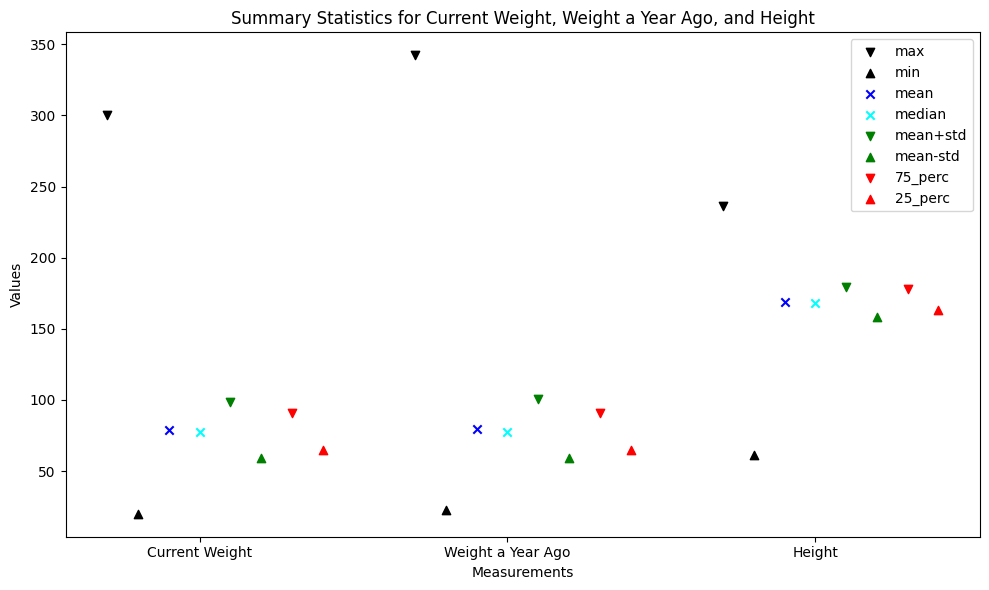

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from a specified file path
file_path = '/content/sample_data/ITEC610_assessment3_data.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Renaming columns
data = data.rename(columns={'weight2': 'current_weight', 'wtyrago': 'weight_a_year_ago', 'htm3': 'height'})

# Dropping rows with missing values
filtered_data = data[['current_weight', 'weight_a_year_ago', 'height']].dropna()

# Calculating summary statistics
summary_stats = {
    'current_weight': {
        'mean': filtered_data['current_weight'].mean(),
        'median': filtered_data['current_weight'].median(),
        'std': filtered_data['current_weight'].std(),
        'min': filtered_data['current_weight'].min(),
        'max': filtered_data['current_weight'].max(),
        '25_perc': filtered_data['current_weight'].quantile(0.25),
        '75_perc': filtered_data['current_weight'].quantile(0.75)
    },
    'weight_a_year_ago': {
        'mean': filtered_data['weight_a_year_ago'].mean(),
        'median': filtered_data['weight_a_year_ago'].median(),
        'std': filtered_data['weight_a_year_ago'].std(),
        'min': filtered_data['weight_a_year_ago'].min(),
        'max': filtered_data['weight_a_year_ago'].max(),
        '25_perc': filtered_data['weight_a_year_ago'].quantile(0.25),
        '75_perc': filtered_data['weight_a_year_ago'].quantile(0.75)
    },
    'height': {
        'mean': filtered_data['height'].mean(),
        'median': filtered_data['height'].median(),
        'std': filtered_data['height'].std(),
        'min': filtered_data['height'].min(),
        'max': filtered_data['height'].max(),
        '25_perc': filtered_data['height'].quantile(0.25),
        '75_perc': filtered_data['height'].quantile(0.75)
    }
}

# Setting up positions and properties for each statistic
categories = ['current_weight', 'weight_a_year_ago', 'height']
x_positions = np.arange(len(categories))
width = 0.1

# Define the statistics to plot and their offsets, colors, and markers
plot_params = {
    'max': {'color': 'black', 'marker': 'v', 'offset': -3 * width},
    'min': {'color': 'black', 'marker': '^', 'offset': -2 * width},
    'mean': {'color': 'blue', 'marker': 'x', 'offset': -width},
    'median': {'color': 'cyan', 'marker': 'x', 'offset': 0},
    'mean+std': {'color': 'green', 'marker': 'v', 'offset': width},
    'mean-std': {'color': 'green', 'marker': '^', 'offset': 2 * width},
    '75_perc': {'color': 'red', 'marker': 'v', 'offset': 3 * width},
    '25_perc': {'color': 'red', 'marker': '^', 'offset': 4 * width}
}

# Plotting each statistic
plt.figure(figsize=(10, 6))
for stat, params in plot_params.items():
    if stat == 'mean+std':
        values = [summary_stats[cat]['mean'] + summary_stats[cat]['std'] for cat in categories]
    elif stat == 'mean-std':
        values = [summary_stats[cat]['mean'] - summary_stats[cat]['std'] for cat in categories]
    else:
        values = [summary_stats[cat][stat] for cat in categories]
    plt.scatter(x_positions + params['offset'], values, color=params['color'], marker=params['marker'], label=stat)

# Final plot
plt.xticks(x_positions, ['Current Weight', 'Weight a Year Ago', 'Height'])
plt.ylabel("Values")
plt.xlabel("Measurements")
plt.legend(loc="best")
plt.title("Summary Statistics for Current Weight, Weight a Year Ago, and Height")
plt.tight_layout()
plt.show()


The following code does some data analysis: it loads a dataset, cleans it, calculates summary statistics, and visualizes the results. It actualizes three Python libraries: pandas for manipulation, matplotlib.pyplot for plotting, and numpy for numerical operations. First, it loads the dataset from a file path, then renames some columns with the intention of easier interpretation. Then, it removes the rows where values are missing to get accurate calculations.

The code proceeds to compute summary statistics for the three key variables, namely current_weight, weight_a_year_ago, and height. More precisely, this involves mean, median, standard deviation, minimum, maximum, the 25th percentile, and the 75th percentile-all within a neat dictionary format for easier access.

Furthermore, this code plots the statistics into scatter plots by specifying the offsets, colors, and markers of each statistic. It maps each statistic to a scatter plot at positions redesigned to not cause any overlap. The last plot visualizes these summary measures so that comparing the three variables, current_weight, weight_a_year_ago, and height, is rather easy. This plot helps in showing differences in distribution as well as variance among current_weight, weight_a_year_ago, and height in acquiring trends across the data.

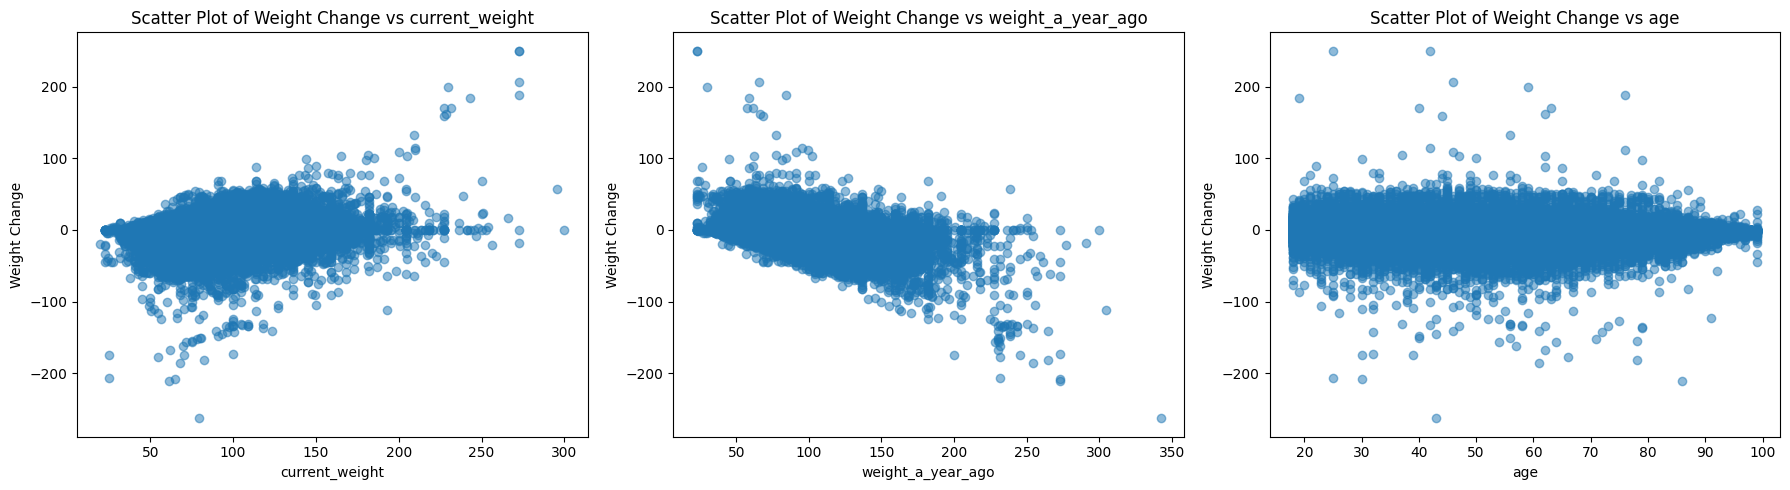

,weight_change
weight_change,1.000000
current_weight,0.034132
weight_a_year_ago,-0.319117
age,-0.068676


In [ ]:
data = pd.read_csv(file_path)

# Rename columns for analysis
data = data.rename(columns={'weight2': 'current_weight', 'wtyrago': 'weight_a_year_ago', 'htm3': 'height'})
filtered_data = data[['current_weight', 'weight_a_year_ago', 'height', 'age']].dropna()

# Define weight_change and calculate correlations
filtered_data['weight_change'] = filtered_data['current_weight'] - filtered_data['weight_a_year_ago']
correlations = filtered_data[['weight_change', 'current_weight', 'weight_a_year_ago', 'age']].corr()
weight_change_correlations = correlations['weight_change']

# Plot scatter plots for each variable
variables_to_plot = ['current_weight', 'weight_a_year_ago', 'age']
plt.figure(figsize=(18, 5))

for i, var in enumerate(variables_to_plot, start=1):
    plt.subplot(1, 3, i)
    plt.scatter(filtered_data[var], filtered_data['weight_change'], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('Weight Change')
    plt.title(f'Scatter Plot of Weight Change vs {var}')

plt.tight_layout()
plt.show()

# Displaying the correlations
weight_change_correlations


The code inspects the relation between changes in weight over time and other variables. Firstly, it loads a dataset and renames key columns for better clarity. Following the assurance of data integrity through dropping rows with missing values, a new variable, weight_change, is defined as the difference between current_weight and weight_a_year_ago. This could help in assessing how much the weights of individuals have changed over the stipulated period.

Next, the code calculates the correlation coefficients of weight_change with the variables: current_weight, weight_a_year_ago, and age. These correlations will give the magnitude and direction of the relationships; these results are stored in a variable called weight_change_correlations for convenience:.

Seeing these relationships graphically, the code below creates scatter plots of weight_change versus each variable: each subplot shows potential data trends or patterns-for example, whether higher past weights are associated with larger weight changes. This visual analysis helps further understand the nature of these weight variations across different ages and initial weight levels. Finally, calculated correlations are presented, showing a quantitative summary of these relationships.

In [ ]:
from sklearn.linear_model import LinearRegression

# Defining the dataset
house_sizes = [[1500], [2000], [2500], [3000], [3500]]
house_prices = [250000, 300000, 330000, 360000, 390000]

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model to the data
model.fit(house_sizes, house_prices)

# Predicting the price of a house with 2500 sqft
predicted_price = model.predict([[2500]])[0]
print(f"The Predicated price is: {predicted_price}")


The Predicated price is: 326000.0


This code will predict the price of a house, given its size in square feet. First, we create two lists: one for house sizes and another for their prices. These lists create some real data regarding how price increases with size.

We introduce a tool here called LinearRegression from a Python library called sklearn that helps us find patterns in data. The code below does the following - sets up a "model" which learns the given data of the association between house size and price. Once trained, it could predict the price of the house based on its size.

Q. Here we ask the model to predict the price for a 2500 sqft house. It gives us an approximate price by following the trend it learned from the data. This approach is commonly used in real estate to estimate property values using historical data.









